#### Give a brief write-up about auto-mpg data set - what it is about, where it is available, how many observations, how many attributes, what is the type of each attribute, what we are planning to do with the data set, etc.

##### Step 1: read the file

In [1]:
import pandas as pd

In [54]:
data = pd.read_csv("code/python/auto-mpg.data")
data.shape

(397, 1)

##### We see that the shape (397, 1) is not correct; the shape needs to be (398,9).

a) It looks like the file does not have a header row

b) we dont know what the separator is

So let's dig deeper!

In [55]:
# first, print the data
data

,"18.0 8 307.0 130.0 3504. 12.0 70 1\t""chevrolet chevelle malibu"""
0,15.0 8 350.0 165.0 3693. 11...
1,18.0 8 318.0 150.0 3436. 11...
2,16.0 8 304.0 150.0 3433. 12...
3,17.0 8 302.0 140.0 3449. 10...
4,15.0 8 429.0 198.0 4341. 10...
...,...
392,27.0 4 140.0 86.00 2790. 15...
393,44.0 4 97.00 52.00 2130. 24...
394,32.0 4 135.0 84.00 2295. 11...
395,28.0 4 120.0 79.00 2625. 18...


##### Header row shows that there are 2 types of separators - space, and \t
so let's re-read the file:

In [ ]:
#re-read the file
data = pd.read_csv("code/python/auto-mpg.data", header=None, sep='\s')


##### ... that failed too, possibly because of \t and spaces. let's try a regexp


In [61]:
data = pd.read_csv("code/python/auto-mpg.data", header=None, sep=r'\s+')
data.shape

(398, 9)

##### shape = (398,9) sounds right.

In [64]:
data.dtypes

0    float64
1      int64
2    float64
3     object
4    float64
5    float64
6      int64
7      int64
8     object
dtype: object

##### let's put col headings

In [66]:
data.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

In [67]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


#### This looks absolutely fine now.
Let's plot some graphs then...

In [68]:
import matplotlib.pyplot as plt

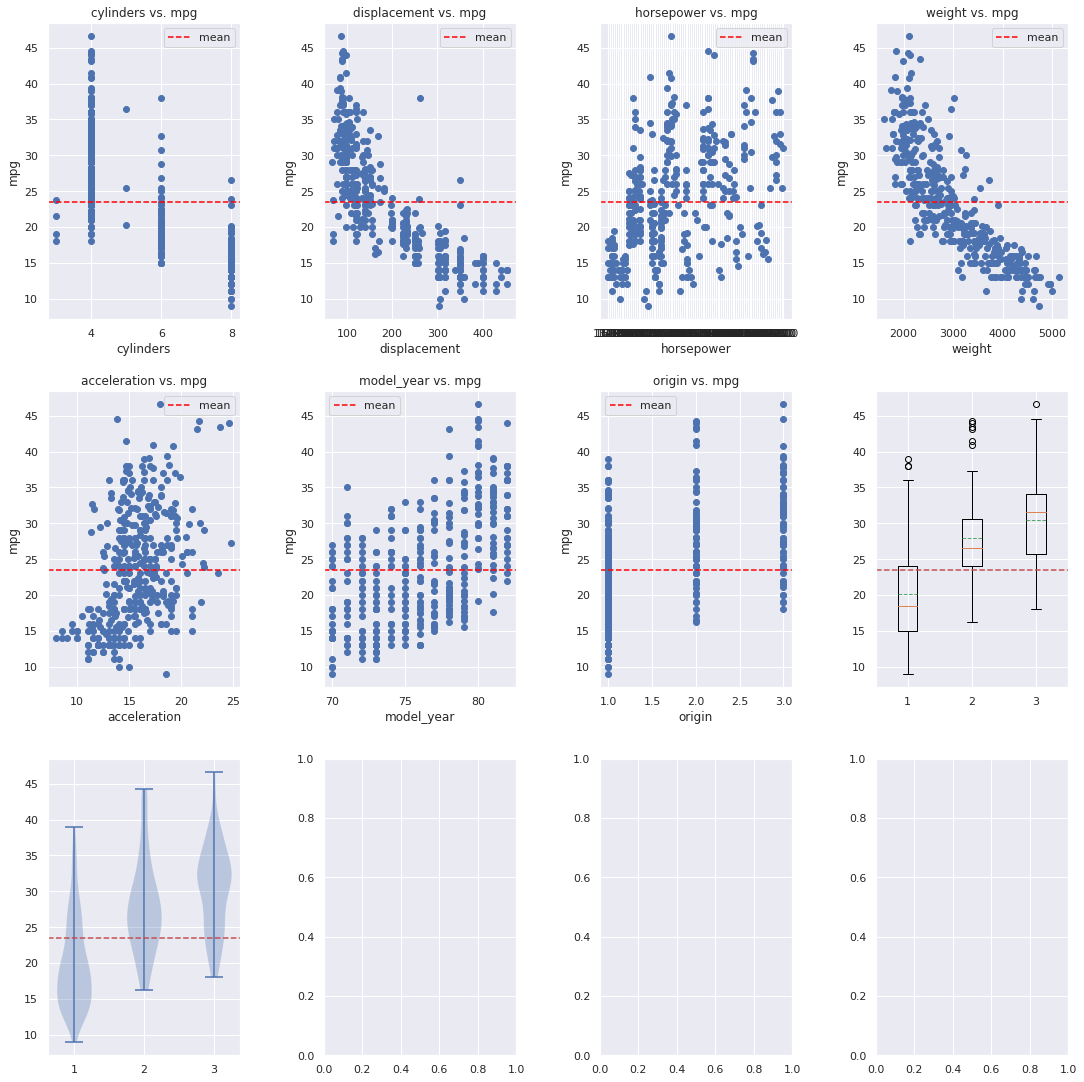

In [309]:
# let's use the OO-APIs
f, ax = plt.subplots(nrows=3,ncols=4, figsize=(16,16))
f.tight_layout(pad=4.0)

def draw_graph(ax, varx, vary):
    ax.scatter(x=data[varx], y=data[vary])
    ax.axhline(data[vary].mean(), linestyle="dashed", color="red", label="mean")
    ax.set_title(varx+" vs. "+vary)
    ax.set_xlabel(varx)
    ax.set_ylabel(vary)
    ax.legend()

draw_graph(ax[0,0], 'cylinders', 'mpg')
draw_graph(ax[0,1], 'displacement', 'mpg')
draw_graph(ax[0,2], 'horsepower', 'mpg')
draw_graph(ax[0,3], 'weight', 'mpg')
draw_graph(ax[1,0], 'acceleration', 'mpg')
draw_graph(ax[1,1], 'model_year', 'mpg')
draw_graph(ax[1,2], 'origin', 'mpg')

df1 = data[data.origin==1].mpg
df2 = data[data.origin==2].mpg
df3 = data[data.origin==3].mpg

ax[1,3].boxplot([df1,df2,df3], meanline=True, showmeans=True)
ax[1,3].axhline(data.mpg.mean(), linestyle="dashed", color='r')

ax[2,0].violinplot([df1,df2,df3])
ax[2,0].axhline(data.mpg.mean(), linestyle="dashed", color='r')


<ipython-input-340-f07f436bcd1c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  testdf = data[data.mpg <= data.mpg.mean()][data.origin == 1]


{'bodies': [<matplotlib.collections.PolyCollection at 0x7fe455182910>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7fe456102790>,
 'cmins': <matplotlib.collections.LineCollection at 0x7fe454b7dc70>,
 'cbars': <matplotlib.collections.LineCollection at 0x7fe456102310>}

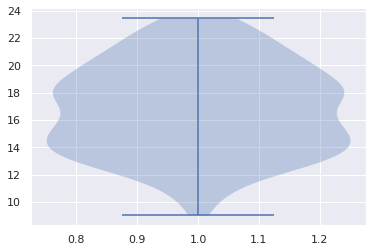

In [340]:
testdf = data[data.mpg <= data.mpg.mean()][data.origin == 1]
plt.violinplot(testdf.mpg)

In [327]:
data[data.origin==2].mpg.mean()

27.891428571428573

In [329]:
data[data.origin==3].mpg.mean()

30.450632911392397

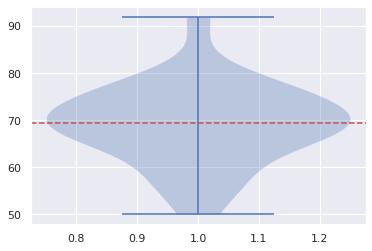

In [325]:
temp = [50, 57, 57, 58, 63, 66, 66, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73, 75, 75, 76, 76, 78, 79, 92]
tempdata = pd.DataFrame(temp,columns=['F'])
plt.violinplot(tempdata)
plt.axhline(tempdata.F.mean(), linestyle='dashed', color='r')
plt.show()


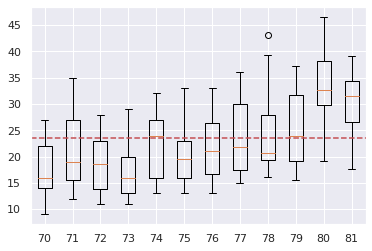

In [344]:
df1 = data[data.model_year==70].mpg
df2 = data[data.model_year==71].mpg
df3 = data[data.model_year==72].mpg
df4 = data[data.model_year==73].mpg
df5 = data[data.model_year==74].mpg
df6 = data[data.model_year==75].mpg
df7 = data[data.model_year==76].mpg
df8 = data[data.model_year==77].mpg
df9 = data[data.model_year==78].mpg
df10 = data[data.model_year==79].mpg
df11 = data[data.model_year==80].mpg
df12 = data[data.model_year==81].mpg

plt.boxplot([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12],labels=[70,71,72,73,74,75,76,77,78,79,80,81])
#ax[1,3].boxplot([df1,df2,df3], meanline=True, showmeans=True)
plt.axhline(data.mpg.mean(), linestyle="dashed", color='r')



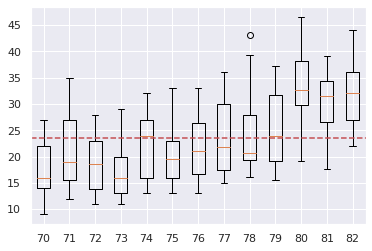

In [358]:
def get_boxplot_data(df, forcols):
    '''
        df: DataFrame
        forcol: boxplot data for which col
    '''
    unique_vals = df[forcols].unique()
    df_arr = list()
    for val in unique_vals:
        df_arr.append(df[df[forcols]==val].mpg)
        
    return df_arr, unique_vals
    #print(unique_vals[0])

arr, x_vals = get_boxplot_data(data, "model_year")
plt.boxplot(arr, labels=x_vals)
plt.axhline(data.mpg.mean(), linestyle="dashed", color='r', showmean=True,)
